In [1]:
import pandas as pd

health_df = pd.read_csv("../data/ihme_data.csv")
sensor_df = pd.read_csv("../data/openaq_data.csv")

In [7]:
health_parameter = "tuberculosis"
aq_parameter = "pm25"

In [8]:
df = pd.merge(health_df[["country", health_parameter]], sensor_df[["country", aq_parameter]])

df.sort_values(aq_parameter, inplace=True)
df.set_index("country", inplace=True)

df[df < 0] = None
df.dropna(how="any", inplace=True)
df[df[health_parameter] > 500] = None

df[health_parameter + "_rolling_avg"] = df[health_parameter].rolling(window=7).mean()

In [5]:
import numpy as np

def f(x):
    return 1.884 * x + 8.734


def g(x):
    return (np.log(x) / np.log(1.058)) - 6.908


def derivert(func, x, dx=1e-8):
    return (func(x + dx) - func(x)) / dx


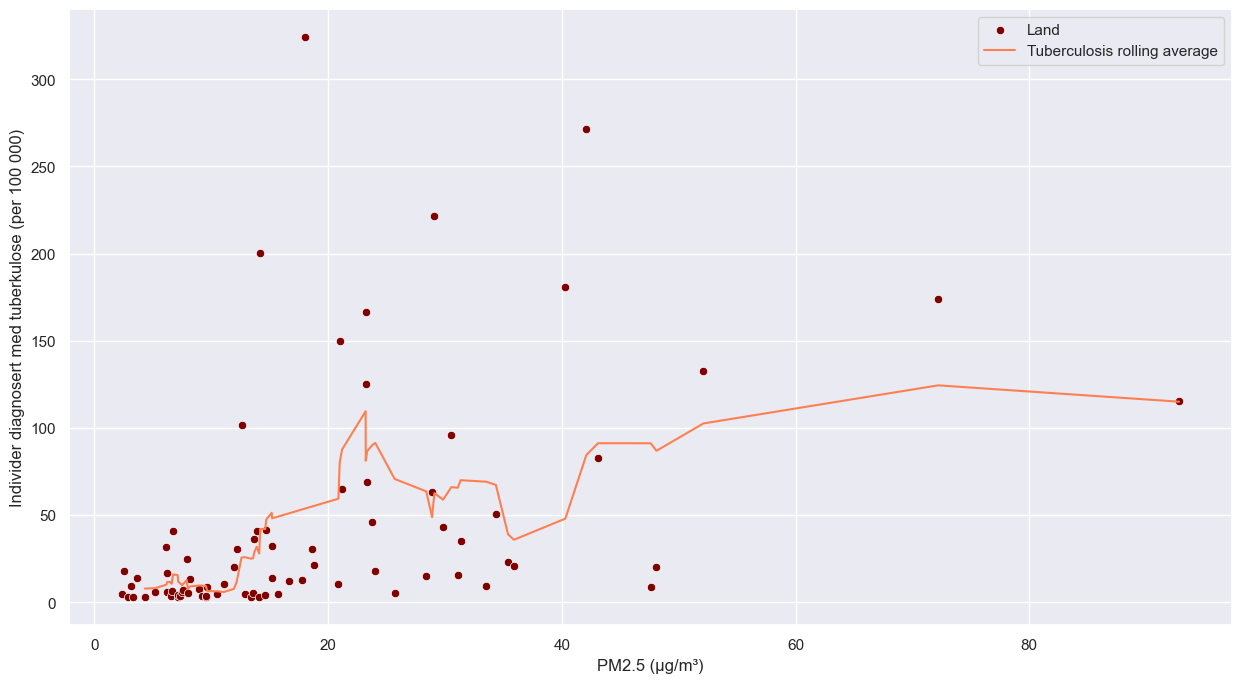

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_range = np.linspace(df[aq_parameter].min(), df[aq_parameter].max(), 1000)

sns.set_theme()
plt.figure(figsize=(15, 8))

# Plotter punkter
sns.scatterplot(
    x=df[aq_parameter], y=df[health_parameter], color="maroon", label="Land"
)

# Plotter glidende gjennomsnitt
sns.lineplot(
    x=df[aq_parameter], y=df[health_parameter + "_rolling_avg"], color="coral", label=r"Tuberculosis rolling average"
)

"""
# Plotter lineær regresjon og den deriverte
sns.lineplot(
    x=x_range, y=f_func(x_range), color="red", label=r"$f(x) = \frac{17.737}{x}$"
)
sns.lineplot(
    x=x_range, y=f_deriv_func(x_range), color="tomato", label=r"$f'(x) = 1,884$"
)

# Plotter logaritmisk regresjon og den deriverte
sns.lineplot(
    x=x_range, y=g(x_range), color="blueviolet", label=r"$g(x) = \frac{ln(x)}{ln(1,058)} - 6,908$"
)
sns.lineplot(
    x=x_range, y=derivert(g, x_range), color="violet", label=r"$g'(x) = \frac{17.737}{x}$"
)
"""

plt.xlabel(f"PM2.5 (µg/m³)")
plt.ylabel(f"Individer diagnosert med tuberkulose (per 100 000)")
plt.show()